# PROJETO DE DISCIPLINA - REDES NEURAIS PROFUNDAS

### Aluno: Gabriel Angelo Bassetti Machado

### 1 - Leia o artigo Review of deep learning: concepts, CNN architectures, challenges, applications, future directions (Alzubaidi, L. 2021). Baseado no artigo, descreva os principais desafios e limitações de DL. Quais alternativas os autores dão aos problemas?

### 2 - Cite 3 aplicações de algoritmos de Deep Learning. Uma delas tem que usar uma solução com CNN e uma delas tem que usar uma solução de RNNs. Explique a aplicação e os resultados obtidos. Não deixe de citar a fonte utilizada, sendo preferencialmente artigos.

### 3 - Vamos fazer uma análise:

- Utilize a base Animals-10- originalmente do Kaggle (5000 imagens de 10 animais diferentes), mas disponibilizada em uma versão menor aqui;
- Utilizando um modelo pré-treinado ResNet-50 (presente no Tensorflow/Keras), e realize as extrações de características, fazendo a projeção das imagens no espaço característico (penúltima camada da ResNet-50);
- Realize a clusterização dos vetores obtidos usando o algoritmo K-médias (K=10);
- Mostre exemplos de imagens dos 10 clusters obtidos;
- Os resultados foram satisfatórios? Justifique utilizando seus conhecimentos sobre avaliação de clusters;
- Disponibilize os códigos, bem como o relatório final no Github;
- O projeto deve estar na organização proposta pela TDSP (Microsoft).


#### 3.1 - Importando bibliotecas

In [71]:

import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import tensorflow as tf
import tensorflow.keras as K

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


#### 3.2 - Importando imagens e verificando

In [13]:
# Função para carregar imagens e pré-processá-las
def load_images(image_paths, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        images.append(img)
    return np.vstack(images)

In [14]:
# Diretório contendo as imagens
base_dir = r'C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\10 - Deeplearning\PD\imagens'

# Lista todas as pastas dentro do diretório
pastas = [nome for nome in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, nome))]

# Imprime o nome de todas as pastas
for pasta in pastas:
    print(pasta)

butterfly
cat
chicken
cow
dogs
elephant
horse
sheep
spider
squirrel


In [23]:
image_files = os.listdir(base_dir)

In [48]:
paths = []

for img in image_files:
    path2 = os.path.join(base_dir, img)
    for img2 in os.listdir(path2):
        #print(os.path.join(path2, img2))
        path3 = (os.path.join(path2, img2))
        paths.append(path3)

In [60]:
for elem in paths:
    print(elem)

C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\10 - Deeplearning\PD\imagens\butterfly\e030b20928e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\10 - Deeplearning\PD\imagens\butterfly\e132b60e2af51c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg
C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\10 - Deeplearning\PD\imagens\butterfly\e831b00c2ef3093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\10 - Deeplearning\PD\imagens\butterfly\e831b30a28f21c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg
C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\10 - Deeplearning\PD\imagens\butterfly\e832b4082df5003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\10 - Deeplearning\PD\imagens\butterfly\e833b40e28f01c22d2524518b7444f92e37fe5d404b0144390f8c770a1edb6_640.jpg
C:\Users\Gabriel-PC\Bootcamp-Dat

In [62]:
images = load_images(paths)
print(images)

[[[[  14.060997     30.221        27.32      ]
   [  15.060997     31.221        28.32      ]
   [  19.060997     32.221        31.32      ]
   ...
   [ -33.939003     12.221001    -14.68      ]
   [ -33.939003     12.221001    -14.68      ]
   [ -34.939003     11.221001    -15.68      ]]

  [[  14.060997     30.221        27.32      ]
   [  16.060997     32.221        29.32      ]
   [  19.060997     32.221        31.32      ]
   ...
   [ -32.939003     13.221001    -13.68      ]
   [ -31.939003     11.221001    -14.68      ]
   [ -34.939003      8.221001    -17.68      ]]

  [[  14.060997     30.221        27.32      ]
   [  15.060997     31.221        28.32      ]
   [  18.060997     31.221        30.32      ]
   ...
   [ -31.939003     11.221001    -14.68      ]
   [ -32.939003     10.221001    -15.68      ]
   [ -32.939003      8.221001    -15.68      ]]

  ...

  [[ -19.939003     47.221        41.32      ]
   [ -20.939003     46.221        40.32      ]
   [ -20.939003     46.221

In [63]:
images.shape

(5000, 224, 224, 3)

In [64]:
# Carregar as imagens e obter as features da penúltima camada da ResNet50
model = ResNet50(weights='imagenet', include_top=False)

In [65]:
features = model.predict(images)
features_flatten = features.reshape(features.shape[0], -1)

157/157 [==============================] - 162s 1s/step


In [66]:
features_flatten[0]

array([0.        , 0.        , 0.        , ..., 0.06594431, 0.        ,
       0.        ], dtype=float32)

In [67]:
# Clusterização usando K-means
kmeans = KMeans(n_clusters=10)
kmeans.fit(features_flatten)
cluster_labels = kmeans.labels_

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


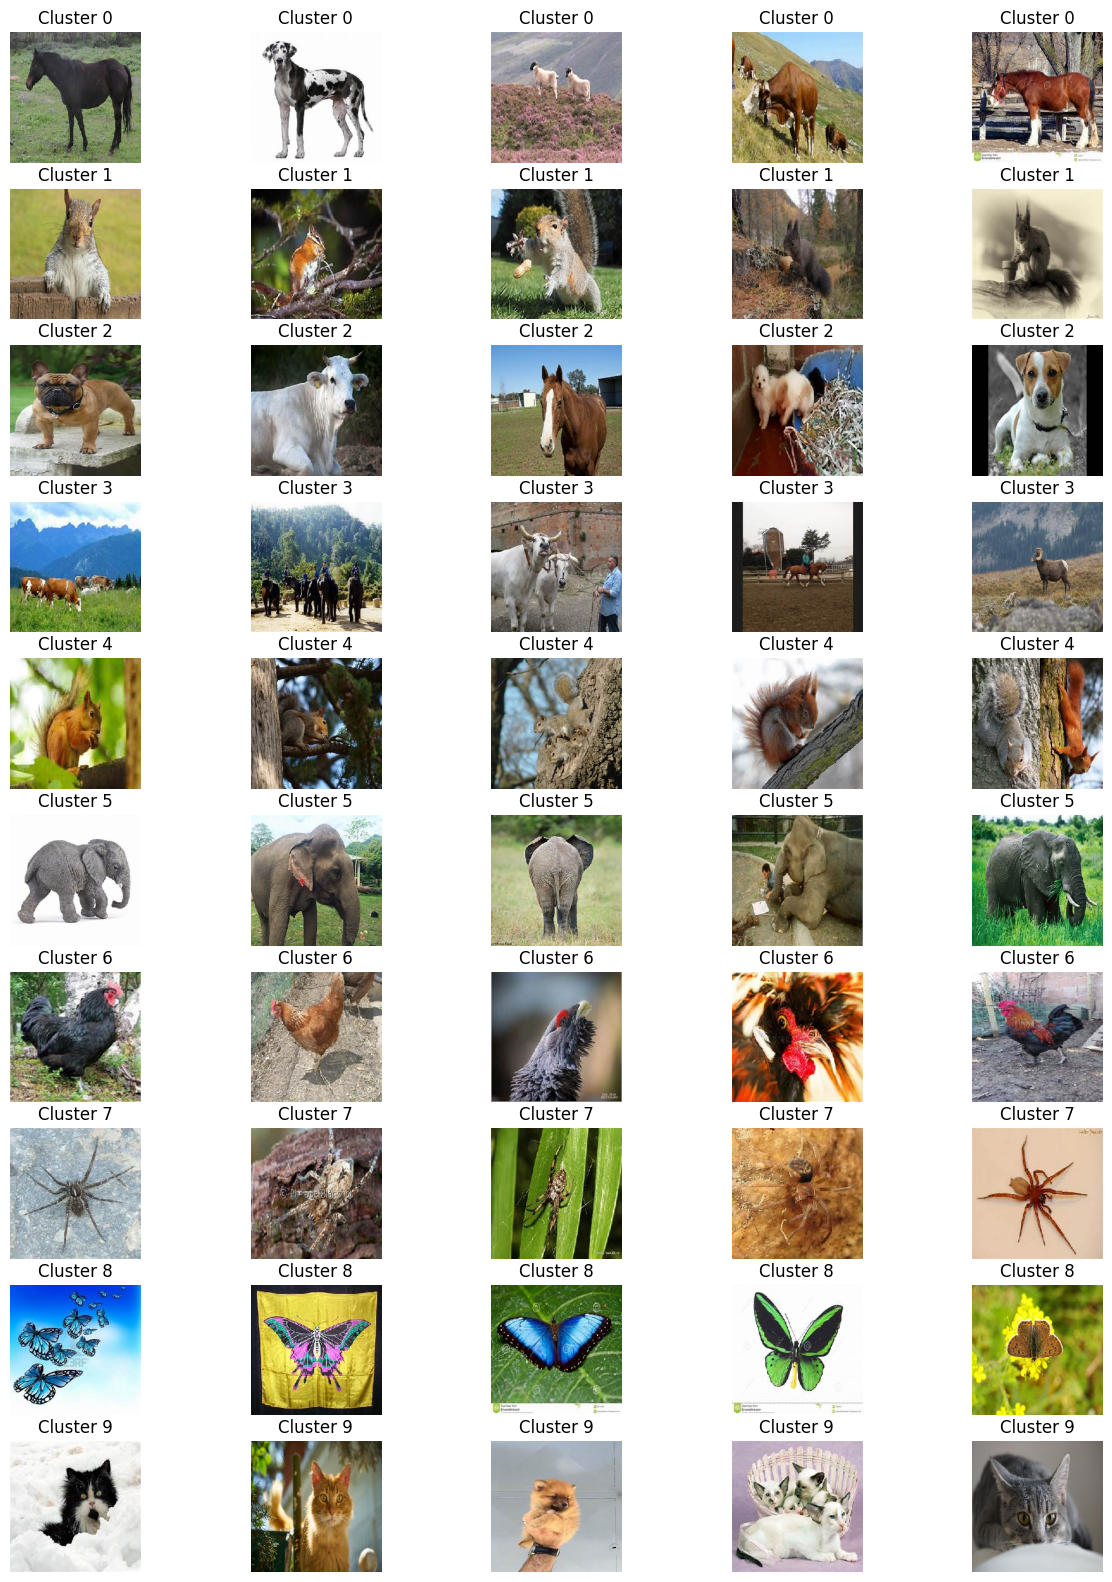

In [69]:
# Exibir exemplos de imagens para cada cluster
num_examples = 5
fig, axs = plt.subplots(10, num_examples, figsize=(15, 20))

for cluster_id in range(10):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_samples = np.random.choice(cluster_indices, num_examples, replace=False)
    for i, sample_idx in enumerate(cluster_samples):
        img = image.load_img(paths[sample_idx], target_size=(224, 224))
        axs[cluster_id, i].imshow(img)
        axs[cluster_id, i].axis('off')
        axs[cluster_id, i].set_title(f'Cluster {cluster_id}')

plt.show()

#### 3.3 - Criando e treinando modelo

In [ ]:
# import tensorflow.keras as K

In [ ]:
# input = load_image_from_kaggle()
# model_resnet = K.resnet50(params)
# output = model_resnet(input)

In [ ]:
# ####
#        modelo_kmenans = Kmeans(k=params)
#        result = Kmeans(output)
#        metrics (result)
#        xxxxxxx
#        xxxxxxx
#        xxxxxxxx
#        xxxxxxx

#  ###

In [ ]:
# res_netModel = K.applications.ResNet50(include_top=False)

In [ ]:
# model = K.models.Sequential()
# model.add(res_netModel)
# model.add(K.layers.Flatten())

In [ ]:
# model = K.models.Sequential()
# model.add(res_netModel)
# model.add(K.layers.Flatten())

#### 3.4 - Avaliação do modelo

In [ ]:
# plt.plot(history.history['accuracy'],
#           label='accuracy')
# plt.plot(history.history['val_accuracy'],
#           label= 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc= 'lower right')

# test_loss, test_acc = model.evaluate( test_images,
#                                       test_labels,
#                                         verbose= 2)

In [ ]:
# plt.plot(history.history['loss'],
#           label='loss')
# plt.plot(history.history['val_loss'],
#           label= 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.ylim([0.5, 1])
# plt.legend(loc= 'upper right')

# test_loss, test_acc = model.evaluate( test_images,
#                                       test_labels,
#                                         verbose= 2)

In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir logs

In [ ]:
# print(test_acc)

### 4 - Utilizando a biblioteca sklearn-llm (você necessitará de uma chave de acesso da openai), crie um classificador de sentimentos usando a classe ZeroShotGPTClassifier com o modelo gpt-3.5-turbo. (use o dataset get_classification_dataset, com os labels ["positive', "negative", "neutral"]). Apresente o código realizado.

In [72]:
# from skllm.config import SKLLMConfig
# SKLLMConfig.set_openai_key("chave")
# SKLLMConfig.set_openai_org("Personal")

In [73]:
from skllm import ZeroShotGPTClassifier
from skllm.datasets import get_classification_dataset

In [74]:
# demo sentiment analysis dataset
# labels: positive, negative, neutral
X, y = get_classification_dataset()

clf = ZeroShotGPTClassifier(openai_model = "gpt-3.5-turbo")
clf.fit(X, y)
labels = clf.predict(X)

  3%|▎         | 1/30 [00:09<04:21,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


  7%|▋         | 2/30 [00:18<04:12,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 10%|█         | 3/30 [00:27<04:03,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 13%|█▎        | 4/30 [00:36<03:54,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 17%|█▋        | 5/30 [00:45<03:45,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 20%|██        | 6/30 [00:54<03:36,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 23%|██▎       | 7/30 [01:03<03:27,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 27%|██▋       | 8/30 [01:12<03:18,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 30%|███       | 9/30 [01:21<03:09,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 33%|███▎      | 10/30 [01:30<03:00,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 37%|███▋      | 11/30 [01:39<02:51,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 40%|████      | 12/30 [01:48<02:42,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 43%|████▎     | 13/30 [01:57<02:33,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 47%|████▋     | 14/30 [02:06<02:24,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 50%|█████     | 15/30 [02:15<02:15,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 53%|█████▎    | 16/30 [02:24<02:06,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 57%|█████▋    | 17/30 [02:33<01:57,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 60%|██████    | 18/30 [02:42<01:48,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 63%|██████▎   | 19/30 [02:51<01:39,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 67%|██████▋   | 20/30 [03:00<01:30,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 70%|███████   | 21/30 [03:09<01:21,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 73%|███████▎  | 22/30 [03:18<01:12,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 77%|███████▋  | 23/30 [03:27<01:03,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 80%|████████  | 24/30 [03:36<00:54,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 83%|████████▎ | 25/30 [03:45<00:45,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 87%|████████▋ | 26/30 [03:54<00:36,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 90%|█████████ | 27/30 [04:03<00:27,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 93%|█████████▎| 28/30 [04:12<00:18,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 97%|█████████▋| 29/30 [04:21<00:09,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


100%|██████████| 30/30 [04:30<00:00,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


In [75]:
labels

['negative',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative']